Primeiras linhas do dataset:
    Unnamed: 0  carat      cut color clarity  depth  table  price     x     y  \
0           1   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98   
1           2   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84   
2           3   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07   
3           4   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23   
4           5   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35   

      z  
0  2.43  
1  2.31  
2  2.31  
3  2.63  
4  2.75  
Resumo de Dados Faltantes:
             Valores Faltantes  Porcentagem (%)
Unnamed: 0                  0              0.0
carat                       0              0.0
cut                         0              0.0
color                       0              0.0
clarity                     0              0.0
depth                       0              0.0
table                       0              0.0
price                    

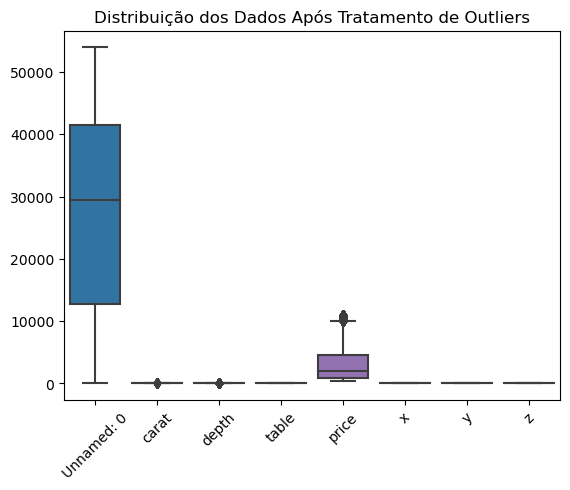

Dados limpos e transformados salvos em: C:\Users\menon\OneDrive\Documentos\Menon\CarlaMenon\02-comparative_analysis_limpo.csv


In [1]:
# Importando bibliotecas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Carregando o dataset
file_path = r"C:\Users\menon\OneDrive\Documentos\Menon\CarlaMenon\Diamonds Prices2022.csv"
data = pd.read_csv(file_path, delimiter=";")  # Ajustando delimitador para o arquivo CSV

# Exibindo as primeiras linhas para inspeção
print("Primeiras linhas do dataset:\n", data.head())

# Tratamento de Dados Faltantes
# Verificando dados faltantes
missing_info = data.isnull().sum().sort_values(ascending=False)
missing_percentage = (missing_info / len(data)) * 100

# Resumo de dados faltantes
missing_summary = pd.DataFrame({
    "Valores Faltantes": missing_info,
    "Porcentagem (%)": missing_percentage
})
print("Resumo de Dados Faltantes:\n", missing_summary)

# Removendo colunas com mais de 40% de valores ausentes
threshold = 40
columns_to_drop = missing_summary[missing_summary["Porcentagem (%)"] > threshold].index
data.drop(columns=columns_to_drop, inplace=True)
print(f"Colunas removidas: {list(columns_to_drop)}")

# Imputação de dados faltantes
# - Para colunas numéricas: Imputar com a média
# - Para colunas categóricas: Imputar com a moda
for column in data.columns:
    if data[column].dtype in ['float64', 'int64']:
        data[column].fillna(data[column].mean(), inplace=True)
    elif data[column].dtype == 'object':
        data[column].fillna(data[column].mode()[0], inplace=True)

# Verificar se ainda há dados faltantes
print("Dados Faltantes Após Imputação:\n", data.isnull().sum().sum())

# Tratamento de Dados Discrepantes (Outliers)
# Função para identificar outliers usando o IQR
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Remover outliers para colunas numéricas
for column in data.select_dtypes(include=['float64', 'int64']).columns:
    data = remove_outliers_iqr(data, column)

# Visualizando os dados após remoção de outliers
sns.boxplot(data=data.select_dtypes(include=['float64', 'int64']))
plt.xticks(rotation=45)
plt.title("Distribuição dos Dados Após Tratamento de Outliers")
plt.show()

# Codificação de Variáveis

## Codificação de variáveis categóricas nominais (exemplo: 'cut', 'color', 'clarity')
# Usando Label Encoding para variáveis ordinais e OneHotEncoding para variáveis nominais

# Exemplo: 'cut', 'color', 'clarity' são variáveis categóricas nominais
label_encoder = LabelEncoder()

for column in ['cut', 'color', 'clarity']:
    data[column] = label_encoder.fit_transform(data[column])

# Se houver variáveis temporais, por exemplo, 'date' (não fornecido no dataset, mas aplicável)
# Convertendo uma variável de data para formato datetime e extraindo componentes temporais
# Exemplo:
# data['date'] = pd.to_datetime(data['date'], format='%Y-%m-%d')
# data['year'] = data['date'].dt.year
# data['month'] = data['date'].dt.month
# data['day'] = data['date'].dt.day

# Codificação de variáveis textuais (exemplo: 'description')
# Criando uma representação numérica de texto (caso haja essa coluna)
# Caso existam colunas textuais, podemos usar técnicas como TF-IDF ou CountVectorizer.

# Exemplo:
# from sklearn.feature_extraction.text import TfidfVectorizer
# vectorizer = TfidfVectorizer()
# text_data = vectorizer.fit_transform(data['description'])
# Adiciona as features do texto ao dataset:
# data = pd.concat([data, pd.DataFrame(text_data.toarray(), columns=vectorizer.get_feature_names_out())], axis=1)

# Salvando os Dados Transformados
output_path = r"C:\Users\menon\OneDrive\Documentos\Menon\CarlaMenon\02-comparative_analysis_limpo.csv"
data.to_csv(output_path, index=False)
print(f"Dados limpos e transformados salvos em: {output_path}")
